# Introdução à biblioteca Matplotlib


O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.

O matplotlib pode ser conceitualmente dividido em 3 partes:

* pylab: conjunto de funções disponíveis em matplotlib.pylab que permite a geração de código similar ao MATLAB.

* frontend ou API: conjunto de classes que realizam o trabalho pesado, criando as figuras, texto, linhas etc. Essa é uma interface abstrata que independe da saída.
        
* backends: conjunto de funções que dependem do dispositivo de saída (display). Por exemplo, PS para gráficos em PostScript, SVG gera gráficos em Scalable Vector Graphics, Agg cria figuras no formato PNG, GTK permite que os gráficos sejam incluídos em aplicações GTK+, e assim para PDF, WxWidgets, Tkinter, etc.

Fonte: http://matplotlib.org


O comando ```%matplotlib``` abaixo é uma "magic function" em IPython. 
De maneira resumida, este comando determina que os resultados devem ser apresentados em linha, diretamente abaixo da célula de código que produziu o gráfico, permitindo o armazenamento dentro do notebook.

In [ ]:
%matplotlib inline

# Instalando a biblioteca matplotlib

In [ ]:
! pip install matplotlib

# Usando matplolib


## puro OO

Mas antes, vamos gerar dados usando Numpy

In [ ]:
import numpy as np
# Gerando dados aleatórios (seguindo a distribuição normal) usando numpy 
x = np.random.randn(1000)
y = np.random.randn(1000)

print(y.mean())
print(y.std())
print(y.min())
print(y.max())

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure

# definindo o tamanho da figura
fig = Figure(figsize=(5, 5))

# definindo qual canvas utilizar 
canvas = FigureCanvas(fig)

# Create a new Axes object using the subplot function from the Figure object
ax = fig.add_subplot(1,1,1) # "the three integers are R, C, and P in order, the subplot will take the Pth position on a grid with R rows and C columns"

In [ ]:
# Pedimos uma distribuição normal, logo precisamos definir os intervalos de desvio padrão compatíveis ( quantos % da amostra estão em -2,2 ?)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4]) #use 100 para histogramas

#ax.hist(x, bins=50)
ax.scatter(x, y)

# adicionando um título ao gráfico
ax.set_title('Normally distributed data')

ax.yaxis.set_label_text("um label para y") #forma de acesso ao eixo interno
ax.set_xlabel("um label para x")

**Exibindo a imagem interativamente através do carregamento do blob da imagem gerada via IPython:**

In [ ]:
from IPython.display import display_png
display_png(fig);

## via Pylab

In [7]:
import matplotlib.pylab as pylab

x = pylab.linspace(0,1000,20) # numpy já vem no namespace
#print(x)

y = pylab.randn(20)
#print(y)

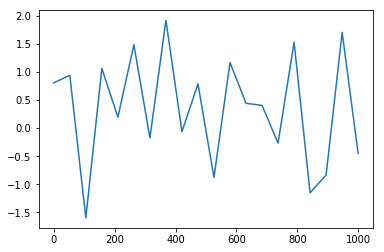

In [8]:
pylab.plot(x,y)
pylab.show()

## via Pyplot

In [9]:
import matplotlib.pyplot as plt

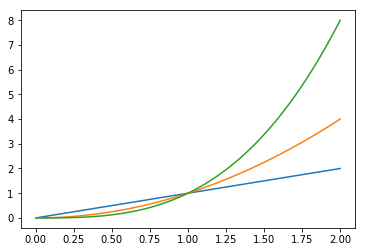

In [10]:
x = np.linspace(0, 2, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.show()

# Alternativas para criação de gráficos

Antes, vamos criar os pontos aleatórios

In [11]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

##  Alterando o estado do objeto + "flush" (modo script)

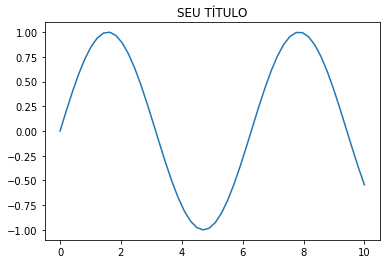

In [12]:
plt.plot(x, y)
plt.title('SEU TÍTULO')
plt.show()

In [13]:
fig, ax = plt.subplots(1,1) 
plt.close() # como se trata do modo inline, o gráfico não é exibido

## Usando subplots()

figtype: <class 'matplotlib.figure.Figure'>
axis_type: <class 'matplotlib.axes._subplots.AxesSubplot'>
plt_gca_id 140427792738232
axis_id 140427792738232


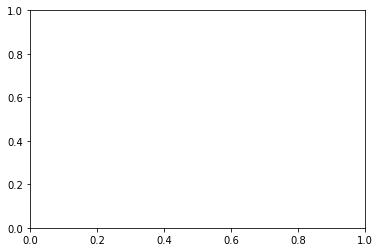

In [14]:
fig, ax = plt.subplots(1,1) # 1,1 - significa 1 linha e 1 coluna (ou seja, apenas um gráfico)

print('figtype:', type(fig))
print('axis_type:' , type(ax))
print('plt_gca_id', id(plt.gca())) 
print('axis_id', id(ax))


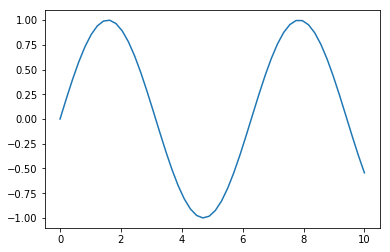

In [15]:
fig,ax = plt.subplots(1,1) # 1,1 - significa 1 linha e 1 coluna (ou seja, apenas um gráfico)

ax.plot(x, y)
plt.show()

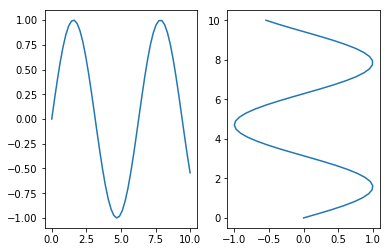

In [16]:
fig,ax = plt.subplots(1,2) # perceba que agora é retornado um vetor para fig e axes

ax[0].plot(x, y)
ax[1].plot(y, x)

plt.show() # "flush" no gráfico

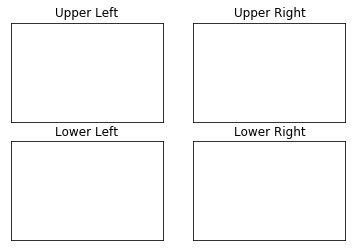

In [17]:
figs, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# Iterando em um multidimensional numpy array, basta usar o atributo `flat`
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

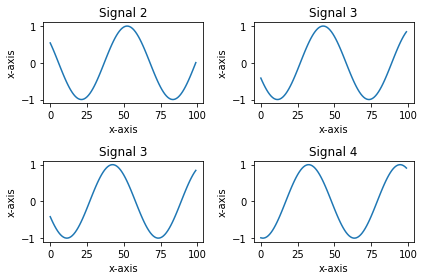

In [18]:
x = np.linspace(0, 10, 100)
y = np.cos(x), np.cos(x + 1), np.cos(x + 2),np.cos(x + 3) 
names = ['Signal 1', 'Signal 2', 'Signal 3', 'Signal 4']

figs, axes = plt.subplots(nrows=2,ncols=2)

for ir, row in enumerate(axes):
    for ic, col in enumerate(row):
        col.plot(y[ir+ic+1])
        col.set_title(names[ir+ic+1])  
        col.set_xlabel('x-axis')
        col.set_ylabel('x-axis')
                
figs.tight_layout()
            
plt.show()

# Elementos de um gráfico

![](https://matplotlib.org/_images/anatomy1.png)


## Título

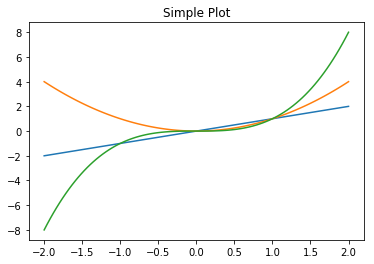

In [19]:
x = np.linspace(-2, 2, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.title("Simple Plot")

plt.show()

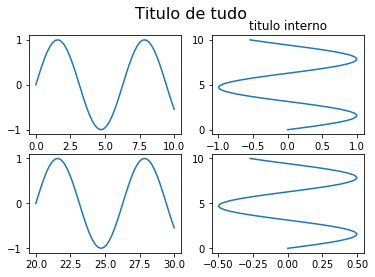

In [20]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

fig,ax = plt.subplots(2,2)
fig.suptitle('Titulo de tudo', fontsize=16)

ax[0][0].plot(x, y)
ax[0][1].set_title("titulo interno")
ax[0][1].plot(y, x)
ax[1][0].plot(x+20, y)
ax[1][1].plot(y/2, x)

plt.show() # faz um "flush" no gráfico

## Legendas

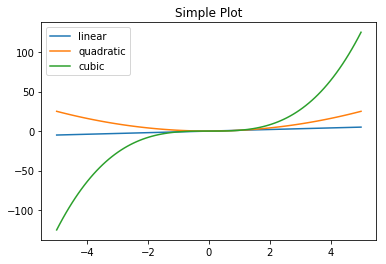

In [21]:
x = np.linspace(-5, 5, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.title("Simple Plot")

plt.legend()

plt.show()

## Thicks

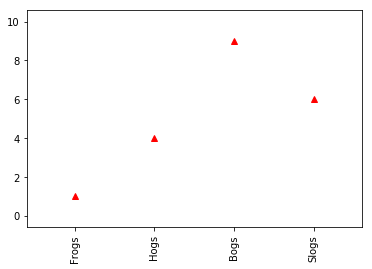

In [22]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'r^')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.show()

## Rótulos

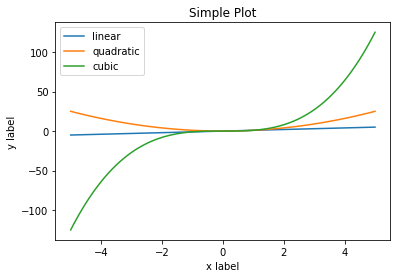

In [23]:
x = np.linspace(-5, 5, 100)

plt.plot(x, x,    label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

## Linhas e Marcadores

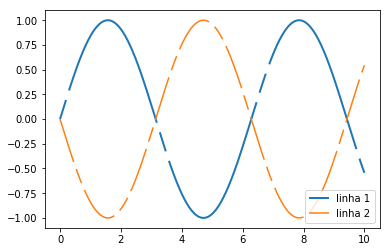

In [24]:
x = np.linspace(0, 10, 500)
y = np.sin(x)
dashes = [10, 5, 100, 5]  # personalizando as linhas: 10 pontos on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()

line1, = ax.plot(x, y, '--', linewidth=2,label='linha 1')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * y , dashes=[30, 5, 10, 5], label='linha 2')

ax.legend(loc='lower right')

plt.show()

# Tipos básicos de gráficos

## Gráfico de linhas

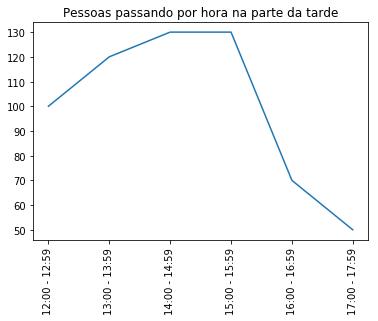

In [25]:
x, y =["12:00 - 12:59","13:00 - 13:59","14:00 - 14:59","15:00 - 15:59","16:00 - 16:59","17:00 - 17:59"], [100, 120, 130,130, 70, 50]
# Criando um gráfico
plt.title("Pessoas passando por hora na parte da tarde")
plt.xticks(rotation='vertical')

plt.plot(x, y)
plt.show()

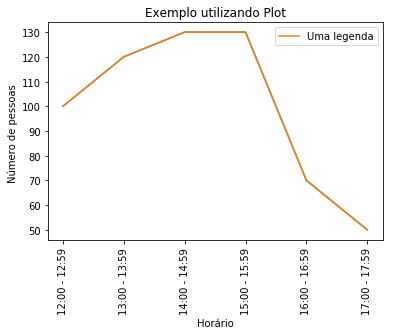

In [26]:
 
# Criando um gráfico
plt.plot(x, y)
 
# Atribuindo um título ao gráfico
plt.title('Exemplo utilizando Plot')
plt.xticks(rotation='vertical')

plt.xlabel('Horário')
plt.ylabel('Número de pessoas ')
 
# Atribuindo uma legenda
plt.plot(x, y, label = 'Uma legenda')
plt.legend()
 
# Exibindo o gráfico gerado
plt.show()

## Gráfico de Barras

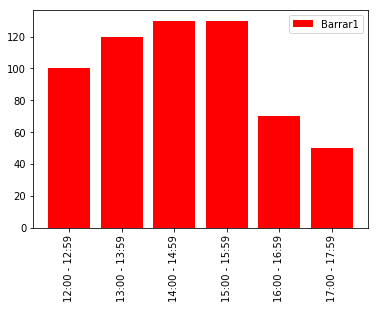

In [27]:
plt.bar(x, y,   label = 'Barrar1', color = 'r')
plt.xticks(rotation='vertical')

plt.legend()

plt.show()

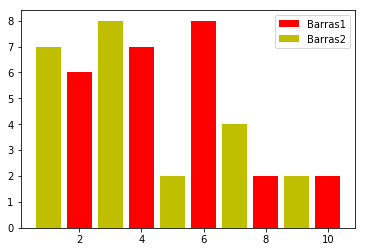

In [28]:
# Definindo variáveis
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 2, 2]
  
x2 = [1, 3, 5, 7, 9]
y2 = [7, 8, 2, 4, 2]

# Criando um gráfico
plt.bar(x, y,   label = 'Barras1', color = 'r')
plt.bar(x2, y2, label = 'Barras2', color = 'y')
plt.legend()

plt.show()

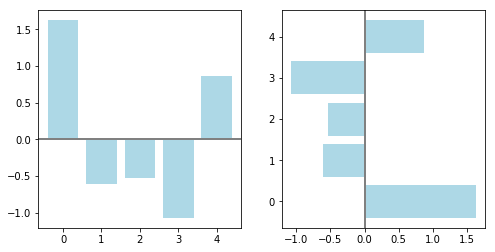

In [29]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()


## Gráfico de dispersão

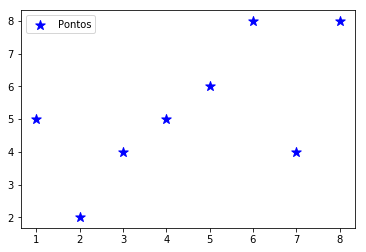

In [30]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 2, 4, 5, 6, 8, 4, 8]
 

plt.scatter(x, y, label = 'Pontos', color = 'b', marker = '*', s = 100)
plt.legend()
  
plt.show()

## Gráfico pizza

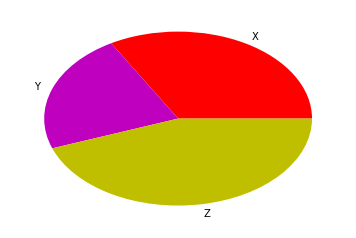

In [31]:
# Definindo variáveis
fatias = [6, 4, 8]
labels = ['X', 'Y', 'Z']
cores  = ['r', 'm', 'y']
 
plt.pie(fatias, labels = labels, colors = cores, shadow = False)
 
plt.show()

# Combinando gráficos

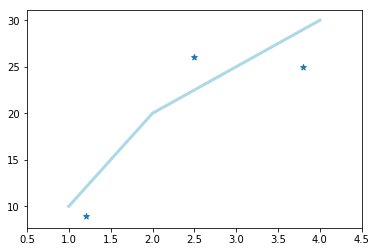

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26],  marker='*')
ax.set_xlim(0.5, 4.5)
plt.show()

# Personalizando Gráficos

## Estilos pre estabelecidos

In [33]:
import matplotlib.pyplot as plt
print(plt.style.available)

['seaborn-deep', 'seaborn', 'seaborn-dark-palette', 'bmh', 'fast', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-talk', '_classic_test', 'seaborn-white', 'seaborn-notebook', 'seaborn-colorblind', 'grayscale', 'ggplot', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-pastel', 'classic', 'seaborn-ticks', 'seaborn-poster', 'dark_background', 'fivethirtyeight', 'seaborn-paper', 'seaborn-muted', 'seaborn-dark', 'tableau-colorblind10']


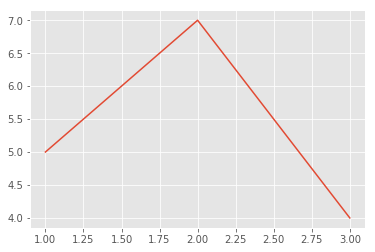

In [34]:
plt.style.use('ggplot')
plt.plot ([1,2,3],[5,7,4])
plt.show()

## Limites nos eixos, cores, estilos de linha, espessura da linha e marcadores

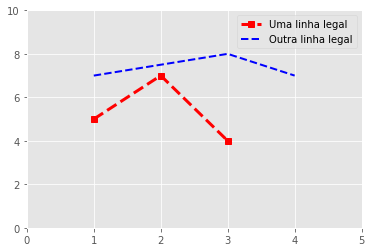

In [35]:
plt.style.use('ggplot')
plt.plot ([1,2,3],[5,7,4], linestyle='--', color='r', marker='s',  linewidth=3.0, label="Uma linha legal")
plt.plot ([1,3,4],[7,8,7], linestyle='--', color='blue', marker='',  linewidth=2.0, label="Outra linha legal")
plt.axis([0,5,0,10])
plt.legend()
plt.show()

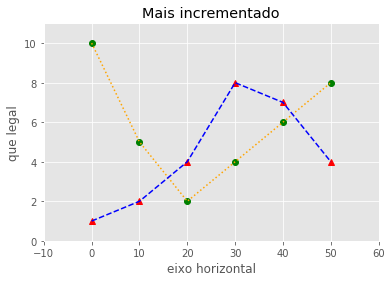

In [36]:

data1 = [10,5,2,4,6,8]
data2 = [ 1,2,4,8,7,4]
x = 10*np.array(range(len(data1)))

plt.plot( x, data1, 'go') # green bolinha
plt.plot( x, data1, 'k:', color='orange') # linha pontilha orange

plt.plot( x, data2, 'r^') # red triangulo
plt.plot( x, data2, 'k--', color='blue')  # linha tracejada azul

plt.axis([-10, 60, 0, 11])
plt.title("Mais incrementado")

plt.grid(True)
plt.xlabel("eixo horizontal")
plt.ylabel("que legal")
plt.show()


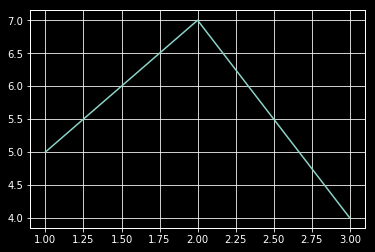

In [37]:
plt.style.use('dark_background')
plt.plot ([1,2,3],[5,7,4])
plt.show()

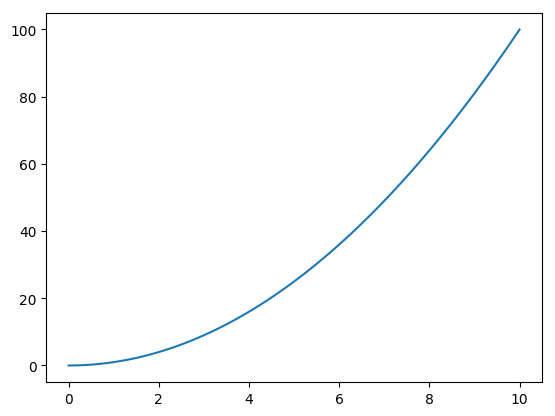

In [38]:
plt.style.use('default')

x = np.linspace(0, 10, 100)

plt.plot(x, x**2)
plt.show()


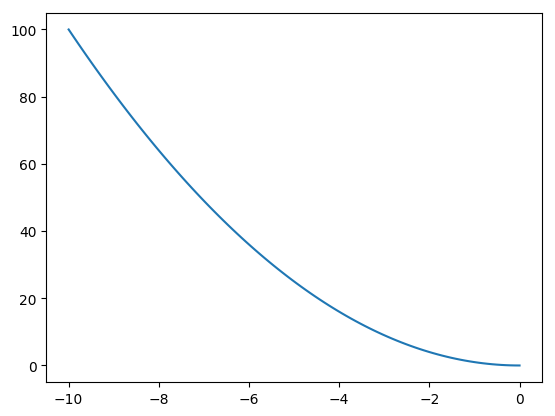

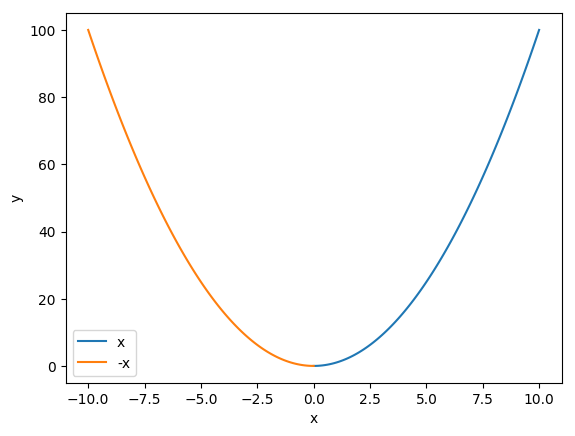

In [39]:
plt.plot(-x, x**2)
plt.show()

plt.ylabel("y")
plt.xlabel("x")

plt.plot(x, x**2,  label="x")
plt.plot(-x, x**2, label="-x")

plt.legend()
plt.show()

In [40]:
# Gerando dados (seguindo a normal, usualmente) usando a biblioteca NumPy
x = np.random.randn(1000)
y = np.random.randn(1000)

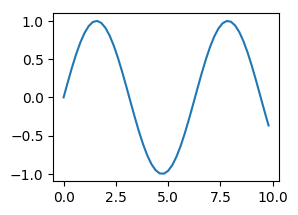

In [41]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(x, y)
plt.show()

# Grids

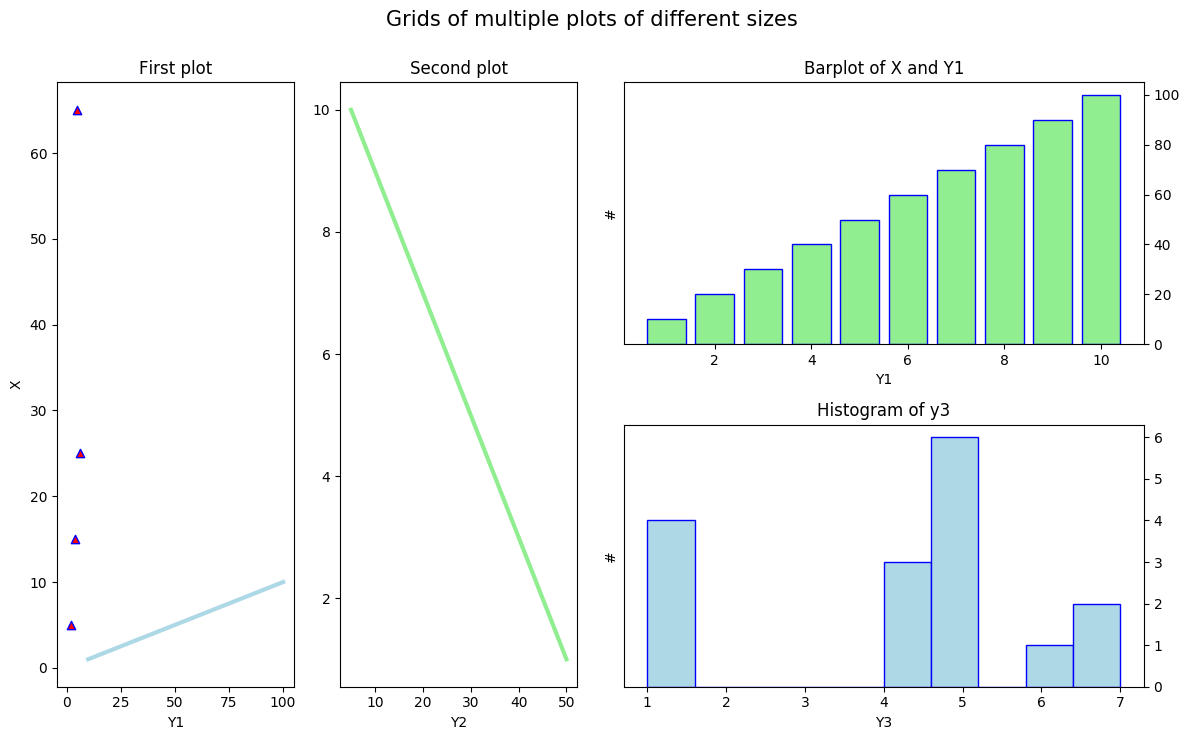

In [42]:
# Exemplo tirado da documentação

x = np.arange(1,11)
y1 = np.arange(10,101, 10)
y2 = np.arange(50,4,-5)
y3 = [1,1,1,1,4,4,4,5,5,5,5,5,5,7,7,6]
gridsize = (2, 4) # 4 rows, 2 columns
fig = plt.figure(figsize=(12, 7)) # this creates a figure without axes
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2) # 2nd argument = origin of individual box
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (1, 2), colspan=2, rowspan=1)

# Now that we have made multiple axes, we can customize each plot individually

# customizing axis 1
ax1.plot(y1, x, color='lightblue', linewidth=3) # make line-plot on axis 1
ax1.scatter([2,4,6,5], [5,15,25, 65],           # add scatter plot in axis 1
           color='red',
           marker='^', 
            edgecolor = 'b')
ax1.set_title('First plot') # set title
ax1.set_xlabel('Y1')
ax1.set_ylabel('X')

# customizing axis 2
ax2.plot(y2, x, color='lightgreen', linewidth=3) # make line-plot on axis 1
ax2.set_xlabel('Y2')
ax2.set_title('Second plot')

# customizing axis 3
ax3.bar(x,y1, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Barplot of X and Y1')
ax3.set_xlabel('Y1')
ax3.set_ylabel('#')
ax3.yaxis.tick_right()

# customizing axis 4
ax4.hist(y3, color = 'lightblue', edgecolor = 'b')
ax4.set_title('Histogram of y3')
ax4.set_xlabel('Y3')
ax4.set_ylabel('#')
ax4.yaxis.tick_right()

# super title of figure
fig.suptitle('Grids of multiple plots of different sizes ', y = 1.05, fontsize=15)

# clean up whitespace padding
fig.tight_layout()

# Extra

## Exportando para arquivos

In [43]:
#plt.savefig('nome_da_imagem.png')

In [44]:
plt.style.reload_library()